In [3]:
%%capture
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error
import category_encoders as ce
from sklearn.impute import SimpleImputer
import pickle

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

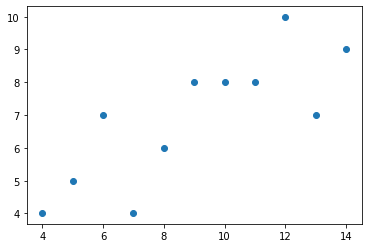

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

matplotlib_figure = plt.figure()
x = [10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5]
y = [ 8,  6,  7,  8,  8,  9,  7,  4, 10,  4,  5]
plt.scatter(x, y)

In [47]:
from plotly.tools import mpl_to_plotly
plotly_figure = mpl_to_plotly(matplotlib_figure)
plotly_figure.show()

# Importing PKL For Plotly Dash Use

In [7]:
df = pd.read_pickle("/Users/user/Documents/GitHub/MIR/Spotify/Dash_Project/master_list.pkl")

In [8]:
X = df.drop("skip_2",axis=1)
y = df["skip_2"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_train.value_counts(normalize=True)

True     0.50727
False    0.49273
Name: skip_2, dtype: float64

# Two Models

In [11]:
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Recall:",recall_score(y_test, y_pred))

Recall: 0.5786249717957932


In [12]:
pipeline2 = make_pipeline(
    ce.TargetEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)
print("Recall:",recall_score(y_test, y_pred))

Recall: 0.5786249717957932


In [15]:
print('Validation Accuracy Random Forrest', accuracy_score(y_test, y_pred))
print('Validation Accuracy XG Boost', accuracy_score(y_test, y_pred2))

Validation Accuracy Random Forrest 0.5412082323223761
Validation Accuracy XG Boost 0.537207350772204


In [16]:
X_train["time_signature"].unique()

array([4, 1, 3, 5, 0])

In [17]:
X_train.describe()

,release_year,us_popularity_estimate,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,mechanism,organism,speechiness,tempo,time_signature,valence
count,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000,9.437920e+05,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000,943792.000000
mean,2012.941036,99.715750,0.535696,0.565429,0.656410,8.889719,0.633954,1.006108,3.424654e-02,5.119842,0.192510,0.589390,0.352465,0.134965,122.127599,3.942186,0.460387
std,10.051351,0.950123,0.162495,0.181756,0.160685,2.503540,0.181381,0.039477,1.476633e-01,3.647172,0.152597,0.214338,0.192724,0.128958,29.299750,0.361334,0.228972
min,1950.000000,90.008624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,99.899547,0.417244,0.434950,0.546669,7.004330,0.524198,0.986802,6.611606e-09,1.000000,0.100037,0.429668,0.200711,0.043240,96.975998,4.000000,0.276425
50%,2017.000000,99.986025,0.535500,0.576769,0.670922,8.715856,0.636002,1.012081,8.812382e-07,5.000000,0.128021,0.627832,0.313701,0.079221,122.250999,4.000000,0.442084
75%,2018.000000,99.998417,0.650891,0.706252,0.774036,10.517122,0.767345,1.032296,1.200129e-04,8.000000,0.240177,0.761719,0.478745,0.196543,144.042007,4.000000,0.624226
max,2018.000000,99.999997,0.990419,0.972590,0.988423,32.342781,0.999902,1.110550,9.999948e-01,11.000000,1.000000,1.000000,0.964116,0.965482,242.317993,5.000000,0.999990


# Prepare for Dash

In [18]:
encoder = ce.TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train,y_train)
X_test_encoded = encoder.transform(X_test)

In [43]:
pipeline = make_pipeline( 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,max_depth=35,min_samples_split=10000)
)

# Fit on train, score on test
pipeline.fit(X_train_encoded, y_train)
y_pred = pipeline.predict(X_test_encoded)
print("Random Forest Recall:",recall_score(y_test, y_pred))
print('Validation Accuracy Random Forrest', accuracy_score(y_test, y_pred))

Random Forest Recall: 0.6979350342211043
Validation Accuracy Random Forrest 0.540352111482191


In [20]:
pipeline2 = make_pipeline( 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline2.fit(X_train_encoded, y_train)
y_pred2 = pipeline2.predict(X_test_encoded)
print("XGB Recall:",recall_score(y_test, y_pred2))
print('Validation Accuracy XG Boost', accuracy_score(y_test, y_pred2))

XGB Recall: 0.7124006585159991
Validation Accuracy XG Boost 0.537207350772204


In [45]:
RandomForest = pipeline
XG_Boost = pipeline2 

In [46]:
#Exort two models for use in the plotly dash app

for model in enumerate([RandomForest,XG_Boost]):
#     print(f'{model[0]}')
    file = open(f'/users/User/Documents/GitHub/MIR/Spotify/spotify-playlist-skipping-predictions/assets/{model[0]}.pkl','wb')
    pickle.dump(model[1],file)
    file.close()

# Dataset Exploration

In [131]:
X_test.describe()

,release_year,us_popularity_estimate,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,mechanism,organism,speechiness,tempo,time_signature,valence
count,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,2.359480e+05,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000
mean,2012.970154,99.716408,0.535387,0.565036,0.656332,8.885745,0.633654,1.006143,3.435981e-02,5.127583,0.192852,0.588873,0.352714,0.134774,122.048602,3.943021,0.459409
std,9.982034,0.949077,0.162504,0.182021,0.160747,2.509477,0.181809,0.039500,1.480248e-01,3.644087,0.152872,0.213933,0.192380,0.128742,29.285580,0.361640,0.228845
min,1950.000000,90.037740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,99.899618,0.417244,0.433820,0.546858,6.995955,0.523033,0.987018,6.698478e-09,1.000000,0.100221,0.429668,0.201810,0.043198,96.975998,4.000000,0.275341
50%,2017.000000,99.986104,0.535414,0.576769,0.671129,8.712061,0.636002,1.012152,8.179231e-07,5.000000,0.128140,0.627329,0.313796,0.079157,122.055000,4.000000,0.441090
75%,2018.000000,99.998430,0.650891,0.706535,0.773455,10.538352,0.767473,1.032361,1.149505e-04,8.000000,0.240730,0.761146,0.477780,0.196425,144.009251,4.000000,0.622197
max,2018.000000,99.999997,0.956032,0.960323,0.984664,38.160179,0.999945,1.110550,9.999756e-01,11.000000,1.000000,1.000000,0.969082,0.964600,244.035004,5.000000,0.996848


In [133]:
min_max = {}
for column in X_test.describe():
    min_max.update({column: [X_test.describe()[column].iloc[[3]][0],X_test.describe()[column].iloc[[7]][0]]})

In [134]:
print(min_max)

{'release_year': [1950.0, 2018.0], 'us_popularity_estimate': [90.03773997498692, 99.99999678325527], 'beat_strength': [0.0, 0.9560315608978271], 'bounciness': [0.0, 0.9603226780891418], 'danceability': [0.0, 0.9846640825271606], 'dyn_range_mean': [0.0, 38.1601791381836], 'energy': [0.0, 0.9999449253082277], 'flatness': [0.0, 1.110550045967102], 'instrumentalness': [0.0, 0.999975562095642], 'key': [0.0, 11.0], 'liveness': [0.0, 1.0], 'mechanism': [0.0, 1.0], 'organism': [0.0, 0.9690818190574646], 'speechiness': [0.0, 0.9645995497703552], 'tempo': [0.0, 244.03500366210938], 'time_signature': [0.0, 5.0], 'valence': [0.0, 0.996847689151764]}


In [135]:
X_test["key"].value_counts()

1     37138
0     24633
7     22755
2     22453
9     21364
11    18953
5     18008
6     17847
10    16429
8     16374
4     15369
3      4625
Name: key, dtype: int64

In [153]:
pipeline2.predict(X_test_encoded.iloc[[3]])

array([ True])

In [184]:
# new_obs = X_test_encoded.iloc[[3]][X_test.columns]

# pipeline2.predict(new_obs)

array([ True])

In [192]:
new_obs = pd.DataFrame(new_obs,columns=X_test.columns)

pipeline2.predict(new_obs)

array([ True])

In [155]:
X_test_encoded.describe()

,release_year,us_popularity_estimate,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,mechanism,mode,organism,speechiness,tempo,time_signature,valence
count,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,2.359480e+05,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000,235948.000000
mean,2012.970154,99.716408,0.535387,0.565036,0.656332,8.885745,0.633654,1.006143,3.435981e-02,5.127583,0.192852,0.588873,0.507271,0.352714,0.134774,122.048602,3.943021,0.459409
std,9.982034,0.949077,0.162504,0.182021,0.160747,2.509477,0.181809,0.039500,1.480248e-01,3.644087,0.152872,0.213933,0.003783,0.192380,0.128742,29.285580,0.361640,0.228845
min,1950.000000,90.037740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.504309,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,99.899618,0.417244,0.433820,0.546858,6.995955,0.523033,0.987018,6.698478e-09,1.000000,0.100221,0.429668,0.504309,0.201810,0.043198,96.975998,4.000000,0.275341
50%,2017.000000,99.986104,0.535414,0.576769,0.671129,8.712061,0.636002,1.012152,8.179231e-07,5.000000,0.128140,0.627329,0.504309,0.313796,0.079157,122.055000,4.000000,0.441090
75%,2018.000000,99.998430,0.650891,0.706535,0.773455,10.538352,0.767473,1.032361,1.149505e-04,8.000000,0.240730,0.761146,0.512103,0.477780,0.196425,144.009251,4.000000,0.622197
max,2018.000000,99.999997,0.956032,0.960323,0.984664,38.160179,0.999945,1.110550,9.999756e-01,11.000000,1.000000,1.000000,0.512103,0.969082,0.964600,244.035004,5.000000,0.996848


In [99]:
import pandas_profiling 

profile_report = X_test.profile_report(check_correlation_pearson= False, correlations={'pearson': False,
                                                                  'spearman': False,
                                                                  'kendall': False,
                                                                  'phi_k': False,
                                                                  'cramers': False,
                                                                  'recoded':False},
                  plot ={'histogram':{'bayesian_blocks_bins': False}})

In [100]:
profile_report

# Blog Post and Visualization Ideas

In [ ]:
### Get feature importances - possibly useful at another time


# rf = pipeline2.named_steps['xgbclassifier']
# importances = pd.Series(rf.feature_importances_, X_test.columns)

# # Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 20
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(color='grey');

In [203]:
encoder = ce.TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train,y_train)
X_val_encoded = encoder.transform(X_val)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((755033, 19), (188759, 19), (755033, 19), (188759, 19))

In [61]:
###possibly useful in the future###

# eval_set = [(X_train_encoded, y_train), 
#             (X_val_encoded, y_val)]

# model = XGBClassifier(
#     n_estimators=1000, # <= 1000 trees, depends on early stopping
#     max_depth=7,       # try deeper trees because of high cardinality categoricals
#     learning_rate=0.1, # try higher learning rate
#     n_jobs=-1
# )

# model.fit(X_train_encoded, y_train, eval_set=eval_set, 
#           eval_metric='error', early_stopping_rounds=50)

In [62]:
###possibly useful in the future###

# results = model.evals_result()
# train_error = results['validation_0']['error']
# val_error = results['validation_1']['error']
# epoch = range(1, len(train_error)+1)
# plt.plot(epoch, train_error, label='Train')
# plt.plot(epoch, val_error, label='Validation')
# plt.ylabel('AUC')
# plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.45, 0.47)) # Zoom in
# plt.xlim((-1, 20)) # Zoom in
# plt.legend();

In [63]:
###possibly useful in the future###



# #Multicollinear Feature Visualization - Very Nice little visualization for Project 

# from collections import defaultdict

# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import spearmanr
# from scipy.cluster import hierarchy


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# corr = spearmanr(X_train).correlation
# corr_linkage = hierarchy.ward(corr)
# dendro = hierarchy.dendrogram(corr_linkage, labels=master_list2.columns, ax=ax1,
#                               leaf_rotation=90)
# dendro_idx = np.arange(0, len(dendro['ivl']))

# ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
# ax2.set_xticks(dendro_idx)
# ax2.set_yticks(dendro_idx)
# ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
# ax2.set_yticklabels(dendro['ivl'])
# fig.tight_layout()
# plt.show()

In [64]:
# from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# gb = make_pipeline(
#     ce.TargetEncoder(), 
#     XGBClassifier(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
# )

# gb.fit(X_train, y_train)
# y_pred = gb.predict(X_val)
# print('Gradient Boosting recall', recall_score(y_val, y_pred))

In [65]:
# # Get feature importances
# rf = pipeline.named_steps['xgbclassifier']
# importances = pd.Series(rf.feature_importances_, X_val.columns)

# # Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 20
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(color='grey');

In [66]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
# import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 72

# #this reveals a directly positively linear relationship between length of session and probability that track was more than partially played 

# from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'us_popularity_estimate'

# isolated = pdp_isolate(
#     model=gb, 
#     dataset=X_val, 
#     model_features=X_val.columns, 
#     feature=feature
# )

# pdp_plot(isolated, feature_name=feature);
# # plt.xlim((99.5, 100)) # Zoom in
# # plt.ylim((-.075, .1)) # Zoom in

master_list2.groupby(["us_popularity_estimate"])["skip_2"].mean()

X_train["us_popularity_estimate"].value_counts()

example = X_val.iloc[[0]]
example2 = X_val.iloc[[2]]

pd.concat([example, example2])

# Creating Shapley Plot

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)
X_test_process = processor.transform(X_test)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

In [351]:
y_pred = gb.predict(X_test[features])

# ROC / AUC Stats

# Put more work into the ROC AUC!!!!

from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test[features])
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

#gb utilized target encoded / XGBOOST 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(gb, X_test, y_test, cv=5, n_jobs=-1, 
                                 method='predict_proba')[:, 1]

In [291]:
y_pred_proba[:2]

array([0.5209954, 0.5222509], dtype=float32)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

#ask about this for the sprint challenge

roc_table = pd.DataFrame({'False Positive Rate': fpr, 
              'True Positive Rate': tpr, 
              'Threshold': thresholds})

combined_table = pd.merge(roc_table,y_test,left_index=True, right_index=True)

combined_table.head(20)

In [355]:
y_pred_df = pd.DataFrame(y_pred, columns = ["skip_2_pred"])

In [356]:
combined_table2 = pd.merge(combined_table,y_pred_df,left_index=True, right_index=True)

combined_table2.head()

In [ ]:
combined_table2.head(20)

for i in zip(combined_table2['skip_2'],combined_table2['skip_2_pred']):
    t_pos = []
    f_pos = []
    print(i[0] == i[1])

# Shapley Plots

X_test[features].iloc[[3094]]

row = X_test[features].iloc[[3094]]

X_test2 = X_test.copy()

from sklearn.preprocessing import OrdinalEncoder
enc = ce.OrdinalEncoder()
enc.fit(X_test2[features])
X_transformed = encoder.transform(X_test2[features])


X_transformed.head()

for column in X_transformed:
    print(column,X_transformed[column].mean())
    pd.DataFrame

# STUDY/PRACTICE THIS CELL FOR THE SPRINT CHALLENGE
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)

feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
shaps.sort_values().plot.barh(color='grey', figsize=(15,20));

In [277]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('Top 3 reasons for prediction:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} is {feature_value}.')

print('\n')
print('Cons:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} is {feature_value}.')

def explain(row_number):
    positive_class = 'Fully Paid'
    positive_class_index = 1
    
    
    # Get & process the data for the row
    row = X_test[features].iloc[[row_number]]
    row_processed = processor.transform(row)
    
    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba
    
    # Show predictiion & probability
    print(f'The model predicts that this track was only played briefly is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)
    
    # Get top 3 "pros & cons"
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index
    
    # Show top 3 reasons for prediction
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')
    
    # Show top 1 counter-argument against prediction
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')
    
    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row
    )

    
explain(3099)

X_train.describe()

# %matplotlib inline
# import seaborn as sns
# sns.distplot(master_list2['loudness']);